In [26]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import ROOT
from ROOT import TChain, TTree,TCanvas,TH1F,TList,TFile,TH2F,TPaveLabel,TPaveText,TLorentzVector

In [5]:
ntuples = 'deepCSV_01_10_2018'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "_node_" in s ]

env: data=/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018
['output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root']


In [6]:
print signal
treepath='tagsDumper/trees/'
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/%s/'%ntuples

['output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root']


In [4]:
signal_df = []
for i,sig in enumerate(signal):
    treename = signal[i][signal[i].find('output_')+7:signal[i].find('.root')].replace('-','_')+'_13TeV_DoubleHTag_0'
    df = rpd.read_root(path+signal[i],treepath+treename)
    print df.shape
    signal_df.append(df)

(16321, 81)
(17824, 81)
(19532, 81)
(20175, 81)
(17241, 81)
(18439, 81)
(17322, 81)
(15523, 81)
(17935, 81)
(17921, 81)
(14611, 81)
(15701, 81)
(16826, 81)
(17526, 81)


In [5]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)


In [6]:
print all_signal.shape
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','nodesCombined','w')

(242897, 81)


### Reweighted 2016 nodes 

In [46]:
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018/'
file = 'output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root'

In [49]:
signal_df = []
for sig in [3,4,5,8,10]:
    treename = 'GluGluToHHTo2B2G_reweighted_node_%d'%sig
    df = rpd.read_root(path+file,treename)
    print df.shape
    df['weight'] = df['weight']/11.75

    signal_df.append(df)
    
#adding SM node :
fileSM='output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root'
signal_df.append(rpd.read_root(path+fileSM,'tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0'))

(208545, 81)
(208545, 81)
(208545, 81)
(208545, 81)
(208545, 81)


In [50]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
print all_signal.shape
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root','nodesCombined','w')

(1060251, 81)


### 2017 nodes 

In [51]:
ntuples = 'ntuples_2017data_20181023'
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/%s/'%ntuples
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "_node_" in s ]
treepath='tagsDumper/trees/'

env: data=/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017data_20181023


In [52]:
signal_df = []
for i,sig in enumerate(signal):
    if '12' in sig : continue
    print signal[i]
    treename = signal[i][signal[i].find('output_')+7:signal[i].find('.root')].replace('-','_')+'_13TeV_DoubleHTag_0'
    df = rpd.read_root(path+signal[i],treepath+treename)
    signal_df.append(df)

output_GluGluToHHTo2B2G_node_2_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_3_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_4_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_7_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_9_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root


In [53]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
print all_signal.shape
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','nodesCombined','w')

(801306, 81)


### Reweight 2017(with more stat) to match 2016
##### But concerving overall integral!

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


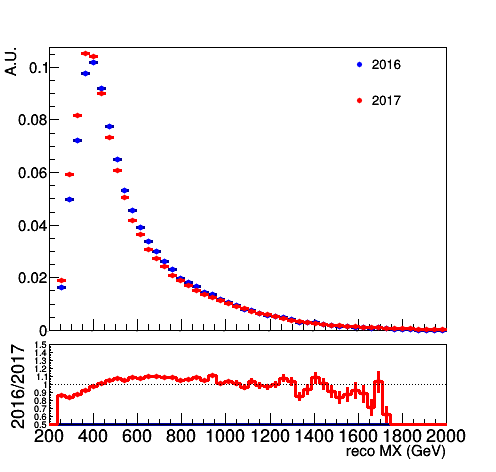

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/reweight2017_to_2016_24_10.pdf has been created


In [54]:
path_2016='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018/'
path_2017='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017data_20181023/'
plot_dir = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/'
date = '24_10'
out = TFile(path_2017+'Node_reweighting_hist.root','recreate')


sum=0.
c = TCanvas("c","c",500,500)
c.SetBottomMargin(0.3)
name='nodesCombined'
infile2016 = TFile(path_2016+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root')
infile2017 = TFile(path_2017+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root')
hists_list=[]
hists_list_2017=[]


tree_2017 = infile2017.Get(name)
hist_2017 = TH1F("hist_2017","hist_2017",50,200,2000)
hist_2017.SetLineColor(2)
hist_2017.SetMarkerColor(2)
tree_2017.Draw("MX>>hist_2017","weight")
    
tree = infile2016.Get(name)
hist = TH1F("hist_2016","hist_2016",50,200,2000)
hist.SetTitle('')
hist.GetXaxis().SetTitle('reco MX (GeV)')
hist.GetYaxis().SetTitle('A.U.')
hist.GetXaxis().SetLabelSize(0)
hist.GetXaxis().SetTitleOffset(0.91)
hist.GetYaxis().SetTitleOffset(1.4)

ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetOptStat(0)
tree.Draw("MX>>hist_2016","weight/11.75")

hist.Scale(1./hist.Integral())
hist_2017.Scale(1./hist_2017.Integral())
    
hist.Draw("APsame")
hists_list.append(hist)
hist_2017.Draw("same")
hists_list_2017.append(hist_2017)


leg = ROOT.TLegend(0.7,0.75,0.9,0.9)
leg.AddEntry(hist,"2016" ,"P")
leg.AddEntry(hist_2017,"2017" ,"P")
leg.SetFillStyle(-1)
leg.SetBorderSize(0)
leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.Draw()



hist_ratio = hist.Clone("ratio")
hist_ratio.Divide(hist_2017)
hist_ratio.SetLineColor(2)
hist_ratio.SetMarkerColor(2)
 
    
    
pad2 = ROOT.TPad("pad2", "pad2", 0., 0., 1., 1.)
pad2.SetTopMargin(0.73)
pad2.SetFillColor(0)
pad2.SetFillStyle(0)
pad2.Draw()
pad2.cd()
frame2 = ROOT.TH1F("frame2","",1,200,2000)
frame2.SetMinimum(0.5)
frame2.SetMaximum(1.5)
frame2.GetYaxis().SetLabelSize(0.02)
frame2.GetXaxis().SetLabelSize(0.04)
frame2.GetYaxis().SetTitleSize(0.04)
frame2.GetXaxis().SetTitle('reco MX (GeV)')
frame2.SetStats(0)
frame2.GetYaxis().SetTitle("2016/2017")
frame2.Draw()
hist_ratio.Draw("HISTsameE")

line = ROOT.TLine(200,1,2000,1)
line.SetLineStyle(3)
line.Draw("same")


out.cd()

hist_ratio.Write()
out.Close()    

c.Draw()
c.SaveAs(plot_dir+'reweight2017_to_2016_'+date+'.pdf')

